In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/codeforces-blog-dataset-for-learning-only/output.xlsx
/kaggle/input/codeforces-blog-dataset-for-learning-only/output.csv


## Metadata of Codeforces blog dataset
Total of **5 columns**. 

1. **id**---> Blog ID (unique to a blog)
2. **title** ---> Blog Title
3. **content** ---> Blog text content. The body of the blog. The whole blog.
4. **authorHandle** ---> Codeforces handle of author of the Blog. Unique to a given author on codeforces.
5. **rating** ---> Upvotes for the blog. -ve value means down-voted. Popularity and likability of the Blog.  

## Using BERT to get embeddings of Blogs

BERT Stands for "Bi-directional Encoder Representations from Trasnformers". It encode the input text data into vector representations, which could be usefull for recommendation using similarity index. Advantage of BERT over traditional TF-IDF approach or FastText is that, it can capture complex semantics & relationships between words in the input text.  

In [5]:
import pandas as pd
df2 = pd.read_excel("/kaggle/input/codeforces-blog-dataset-for-learning-only/output.xlsx")
df2.head()

,id,title,content,authorHandle,authorID,rating
0,70681,ICPC India Online Round 2019 Discussion,This blog is to discuss the problems of ICPC I...,kjain1810,1,113
1,70261,Need help in this problem,This is the problemhttps://codeforces.com/cont...,prabalsingh24,2,0
2,68226,mobil balance problem,"When multiple objects of weight are given,Obta...",bluespace,3,-17
3,68713,"Need help in the problem ""The least Round Way"".","I am getting TLE in TC 11 in the problem,The L...",suvro_coder,4,0
4,70585,Help with DFS,i've been solving this problem for a day nowht...,tensaida,5,-3


In [6]:
blog_titles = df2["title"].tolist()
print(len(blog_titles))
print(blog_titles[:12])

41463
['ICPC India Online Round 2019 Discussion', 'Need help in this problem', 'mobil balance problem', 'Need help in the problem "The least Round Way".', 'Help with DFS', 'Ð¡odeforces Round 591 (and Technocup 2020 â€” Elimination Round 1) Editorial', 'Problem â€” any help?', 'Tricks or best approaches for greedy(ad-hoc) problems?', 'Purpose of Codeforces ', 'Changing "int" to "Integer" gives significant performance improvement!', 'Final ICPC World Finals 2019 Team Ratings â€” What is your prediction?', 'Codeforces Round #603 (Div. 2) Editorial']


In [7]:
import pandas as pd
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim import corpora
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import defaultdict
from tqdm import tqdm
import logging
import re

# Disable gensim logging
logging.getLogger('gensim').setLevel(logging.ERROR)

# Load stopwords and initialize stemmer
stop_words = set(stopwords.words('english'))
# stemmer = PorterStemmer()

# Load the dataset
# df = pd.read_excel('/kaggle/input/codeforces-blog-dataset/output.xlsx')

# Regular expression pattern for words (alphanumeric characters)
# word_pattern = re.compile(r'\b\w+\b')

# Prepare data for LDA
# documents = df['content'].tolist()

# Tokenize, preprocess, and stem documents, removing stopwords and frequent words
word_freq = defaultdict(int)
processed_docs = []
for doc in tqdm(blog_titles, desc="Tokenizing and stemming documents"):
    tokens = word_tokenize(str(doc).lower())  # Convert to lowercase and tokenize
#     tokens = [stemmer.stem(word) for word in tokens if word.isalnum()]  # Stem words
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
#     tokens = [word for word in tokens if word_pattern.match(word)]  # Filter out non-word tokens
    for token in tokens:
        word_freq[token] += 1  # Count word frequency
    processed_docs.append(tokens)

# Filter out frequent words that occur in more than 95% of documents
# num_docs = len(processed_docs)
# freq_words = [word for word, freq in word_freq.items() if freq / num_docs < 0.95]

# Remove frequent words from documents
# processed_docs = [[word for word in doc if word not in freq_words] for doc in processed_docs]

Tokenizing and stemming documents: 100%|██████████| 41463/41463 [00:05<00:00, 8004.28it/s]


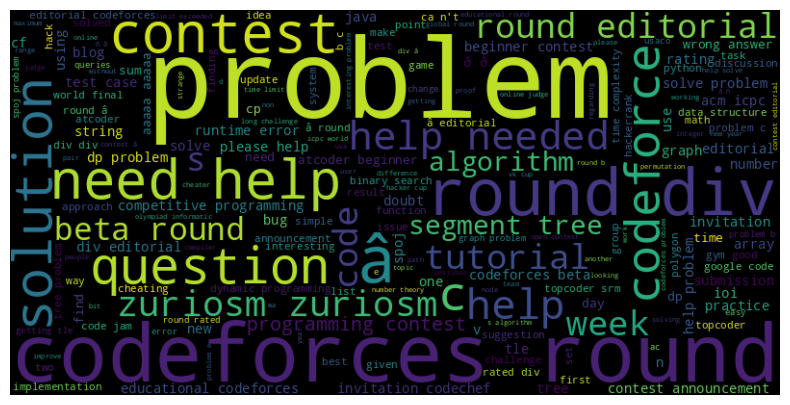

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate Word Cloud
all_words = [word for doc in processed_docs for word in doc]
wordcloud = WordCloud(width=800, height=400, background_color='black', max_words=200).generate(' '.join(all_words))

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
allDocWords = []
for doc in processed_docs:
    allDocWords.extend(doc)

print(len(allDocWords))

233819


In [10]:
count1 = allDocWords.count("dynamic programming")
print(count1)

count2 = allDocWords.count("dynamic")
print(count2)

count3 = allDocWords.count("programming")
print(count3)

0
270
1221


## (n=2) Bi-Gram & (n=3) Tri-Gram approach 

100%|██████████| 41463/41463 [00:00<00:00, 339666.22it/s]


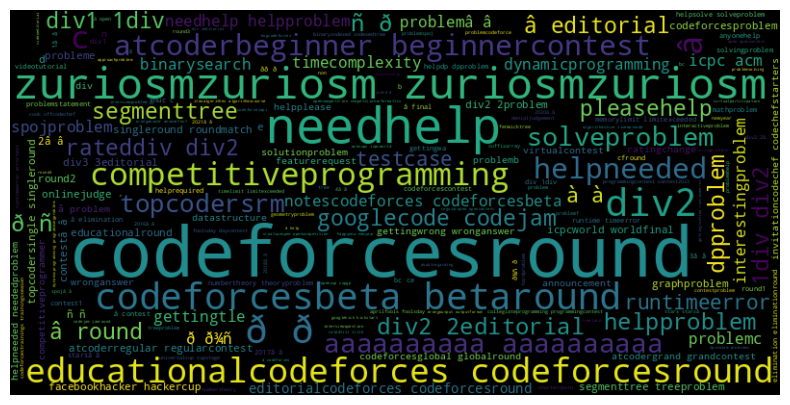

In [11]:
from nltk import ngrams
from tqdm import tqdm
import re


# Bi-gram
n1 = 2
processed_bigrams = []
blog_titles = df2["title"].tolist()

# Regular expression pattern for words (alphanumeric characters)
word_pattern = re.compile(r'\b\w+\b')

for title in tqdm(blog_titles):
    tokens = word_tokenize(str(title).lower())  # Convert to lowercase and tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [word for word in tokens if word_pattern.match(word)]  # Filter out non-word tokens

    title = (' ').join(tokens) 
    bigrams_list = ngrams(str(title).split(), n1)
    processed_bigrams.append(bigrams_list)
    
all_bigrams = []
for doc_bigrams in tqdm(processed_bigrams):
    try: 
        for bigram in doc_bigrams:
            all_bigrams.append((bigram[0] + bigram[1])) 
    except RuntimeError as e:
        continue
        
wordcloud = WordCloud(width=800, height=400, background_color='black', max_words=200).generate(' '.join(all_bigrams))

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

100%|██████████| 41463/41463 [00:00<00:00, 301900.77it/s]


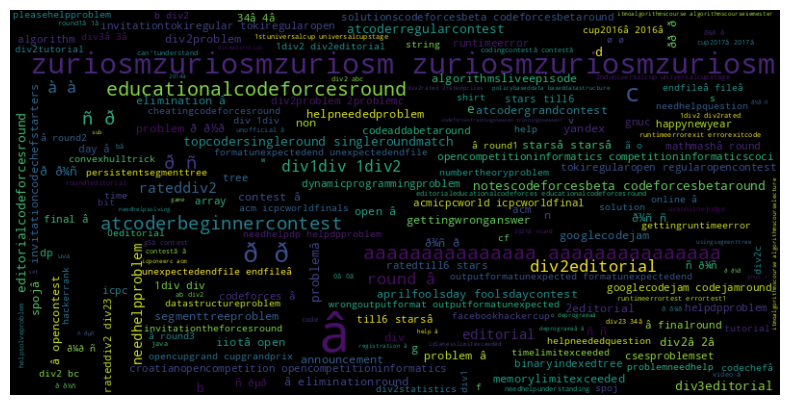

In [12]:
from nltk import ngrams
from tqdm import tqdm
import re

# Tri-gram
n2 = 3
processed_trigrams = []
blog_titles = df2["title"].tolist()

# Regular expression pattern for words (alphanumeric characters)
word_pattern = re.compile(r'\b\w+\b')

for title in tqdm(blog_titles):
    tokens = word_tokenize(str(title).lower())  # Convert to lowercase and tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [word for word in tokens if word_pattern.match(word)]  # Filter out non-word tokens

    title = (' ').join(tokens) 
    trigrams_list = ngrams(str(title).split(), 3)
    processed_trigrams.append(trigrams_list)
    
all_trigrams = []
for doc_trigrams in tqdm(processed_trigrams):
    try:
        for trigram in doc_trigrams:
            if (len(trigram)==3):   
                all_trigrams.append((trigram[0] + trigram[1] + trigram[2])) 
    except RuntimeError as e:
        continue
        
wordcloud = WordCloud(width=800, height=400, background_color='black', max_words=200).generate(' '.join(all_trigrams))

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

100%|██████████| 41463/41463 [00:00<00:00, 278896.95it/s]


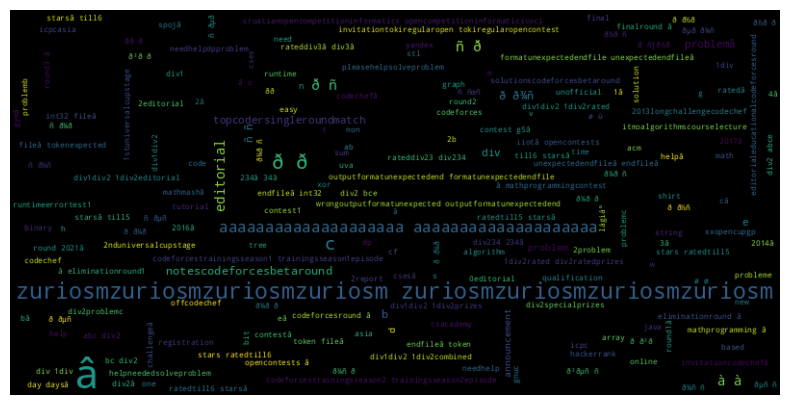

In [13]:
from nltk import ngrams
from tqdm import tqdm
import re

# quad-gram
n3 = 4
processed_quadgrams = []
blog_titles = df2["title"].tolist()

# Regular expression pattern for words (alphanumeric characters)
word_pattern = re.compile(r'\b\w+\b')

for title in tqdm(blog_titles):
    tokens = word_tokenize(str(title).lower())  # Convert to lowercase and tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [word for word in tokens if word_pattern.match(word)]  # Filter out non-word tokens

    title = (' ').join(tokens) 
    quadgrams_list = ngrams(str(title).split(), n3)
    try:
        processed_quadgrams.append(quadgrams_list)
    except RuntimeError as RTE:
        continue
    
all_quadgrams = []
for doc_quadgrams in tqdm(processed_quadgrams):
    try:
        for quadgram in doc_quadgrams:
            if (len(tuple(quadgram))==4): 
                all_quadgrams.append((quadgram[0] + quadgram[1] + quadgram[2] + quadgram[3])) 
    except RuntimeError as e:
        continue
        
wordcloud = WordCloud(width=800, height=400, background_color='black', max_words=200).generate(' '.join(all_quadgrams))

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

100%|██████████| 41463/41463 [00:00<00:00, 295442.07it/s]


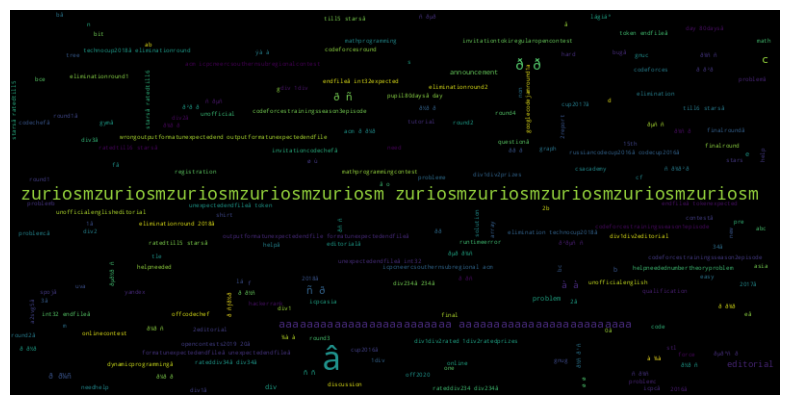

In [14]:
from nltk import ngrams
from tqdm import tqdm
import re

# penta-gram
n4 = 5
processed_pentagrams = []
blog_titles = df2["title"].tolist()

# Regular expression pattern for words (alphanumeric characters)
word_pattern = re.compile(r'\b\w+\b')

for title in tqdm(blog_titles):
    tokens = word_tokenize(str(title).lower())  # Convert to lowercase and tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [word for word in tokens if word_pattern.match(word)]  # Filter out non-word tokens

    title = (' ').join(tokens) 
    pentagrams_list = ngrams(str(title).split(), n4)
    try:
        processed_pentagrams.append(pentagrams_list)
    except RuntimeError as RTE:
        continue
    
all_pentagrams = []
for doc_pentagrams in tqdm(processed_pentagrams):
    try:
        for pentagram in doc_pentagrams:
            if (len(tuple(pentagram))==5): 
                all_pentagrams.append((pentagram[0] + pentagram[1] + pentagram[2] + pentagram[3] + pentagram[4])) 
    except RuntimeError as e:
        continue
        
wordcloud = WordCloud(width=800, height=400, background_color='black', max_words=200).generate(' '.join(all_pentagrams))

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
max_len=0
max_str = ''
max_idx=0
idx=0
for title in df2['title'].tolist():
    if (idx in [4918]):
        continue
    if max_len < len(str(title)):
        max_len=len(str(title))
        max_str=str(title)
        max_idx = idx
    idx+=1
print(max_len)
print(max_str)
print(max_idx)

213
this is my solution for problem E from Codeforces round 731(div3).can anybody tell why it is giving me a wrong output(I have tried dry running all the test cases for my code, but I am not able to find any mistake)
3554


In [16]:
row = df2.iloc[4918]
print(row)

id                                                          93917
title           Lorem ipsum dolor sit amet, consectetur adipis...
content         Lorem ipsum dolor sit amet, consectetur adipis...
authorHandle                                            Oye_Dalle
authorID                                                     2980
rating                                                        -41
Name: 4918, dtype: object


In [17]:
df2 = df2.drop(4918, axis=0)
df2.head()

,id,title,content,authorHandle,authorID,rating
0,70681,ICPC India Online Round 2019 Discussion,This blog is to discuss the problems of ICPC I...,kjain1810,1,113
1,70261,Need help in this problem,This is the problemhttps://codeforces.com/cont...,prabalsingh24,2,0
2,68226,mobil balance problem,"When multiple objects of weight are given,Obta...",bluespace,3,-17
3,68713,"Need help in the problem ""The least Round Way"".","I am getting TLE in TC 11 in the problem,The L...",suvro_coder,4,0
4,70585,Help with DFS,i've been solving this problem for a day nowht...,tensaida,5,-3


In [18]:
df = df2.copy()
df = df.sort_values(by='rating', ascending=True)
df.head(120)

,id,title,content,authorHandle,authorID,rating
25718,123930,Good Bye 2023,"Hello, Codeforces!I am happy to invite you to ...",marzipan,11576,-4617
25955,124060,Appeal. 74TrAkToR,I understand that you are unhappy with my roun...,74TrAkToR,9624,-3611
24056,105129,Codeforces Round #810,Hello Codeforces!We are glad to invite you to ...,Rhodoks,4321,-3431
591,65664,Technocup 2019: Final Round and Codeforces Rou...,Hello everyone!The Final Round of Technocup 20...,KAN,339,-2123
10208,117337,Codeforces Round 880 (Div. 1; Div. 2),With a special dedication to all the people fr...,Anadi,3697,-1467
...,...,...,...,...,...,...
7452,84773,Requesting Arjun Arul to become at least Maste...,Please Codechef or unacademy or whatever organ...,arjunarul_is_a_noob,4153,-75
24613,103734,Top 60 Checklist for Competitive Programming,BASICS & DSAObject Oriented ProgrammingTime &&...,BinaryQueen2,10701,-75
2104,68777,Wrong Judjement or Favouritism to Known coders...,"Hiii everyone,I have found a weird thing in Fa...",rocky1234,290,-75
24284,103204,Dear Anton...,"DearantontrygubO_o, I've seen alot of your pro...",antiMathforces,9655,-74


In [19]:
print(str(df2[df2['id']==84773]['title'].values))
print(str(df2[df2['id']==84773]['content'].values))

['Requesting Arjun Arul to become at least Master before teaching CP']
['Please Codechef or unacademy or whatever organization is doing these camps if u are doing something related to sport programming bring people who have actually particpated hard in coding competitions or are at least Master or above. Don\'t bring math or physics teachers likearjunaruland some more clowns. My own rating is +200 than them like wtf how will they make me "something",when they first need to finish their own homeworkmy time is more important than these jokers fooling around, and stop DMing me, i am not gonna reply FFS']


## LDA for Topic Modelling based on N-Grams

* N = 1,2,3,4,5

* To see which captures the topics best. 

* only 1-word tokens may not capture series of words which together represent a topic.


n-word tokens may capture series of words which are too long and are not the best for topic-modelling.

**Need to find a suitable n.**

* How do we verify, how good the n-value is?

* We can use BERT - embeddings to check for similarity of topics labeled under the same topic number.

* If average similarity / variance abt centroid is lowest for all topics, for a certain n, then it is the best value.

In [36]:
import pandas as pd
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams

# Load data from CSV
data = pd.read_csv('/kaggle/input/codeforces-blog-dataset-for-learning-only/output.csv')
row = data.iloc[4918]
print(row)

data = data.drop(4918, axis=0)

stop_words = set(stopwords.words('english'))

# Preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    tokens = word_tokenize(str(text).lower())  # Convert to lowercase and tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords

    text = (' ').join(tokens) 
    trigrams_list = list(ngrams(str(text).split(), 2))
    trigrams = []
    for trigram in trigrams_list[1:-1]:
        trigrams.append(' '.join([trigram[0], trigram[1]]))
    return trigrams
    

# Apply preprocessing to the 'title' column
data['title_trigrams'] = data['title'].apply(preprocess_text)

# Create dictionary and corpus
dictionary = Dictionary(data['title_trigrams'])
corpus = [dictionary.doc2bow(text) for text in data['title_trigrams']]

# Train LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=12, random_state=42) # Adjust the number of topics as needed

# Get topic distributions for documents
topic_dist = lda_model.get_document_topics(corpus)

# Assign topics to documents
data['topic'] = [max(doc, key=lambda x: x[1])[0] for doc in topic_dist]

# Print topics
for i, topic in lda_model.print_topics():
    print(f"Topic {i}: {topic}")

# Print document-topic distribution
print(data[['title', 'topic']])


id                                                          93917
title           "Lorem ipsum dolor sit amet, consectetur adipi...
content         "Lorem ipsum dolor sit amet, consectetur adipi...
authorHandle                                            Oye_Dalle
authorID                                                     2980
rating                                                        -41
tags                                                           []
Name: 4918, dtype: object
Topic 0: 0.108*"! !" + 0.018*"problem ." + 0.017*"wrong answer" + 0.014*"binary search" + 0.010*"help !" + 0.008*"open contest" + 0.008*"contest (" + 0.008*"contest #" + 0.007*"... ..." + 0.007*"# 3"
Topic 1: 0.021*"— round" + 0.019*"dynamic programming" + 0.013*"help !" + 0.011*"number theory" + 0.010*"need help" + 0.008*": (" + 0.008*"online judge" + 0.007*"? !" + 0.007*"round 1" + 0.006*") problem"
Topic 2: 0.020*"round 2" + 0.018*"code jam" + 0.015*"( rated" + 0.015*"google code" + 0.014*"— editorial" +

In [38]:
data[data['topic']==5].head(11)

,id,title,content,authorHandle,authorID,rating,tags,title_trigrams,topic
1,70261,"""Need help in this problem""","""This is the problemhttps://codeforces.com/con...",prabalsingh24,2,0,[],"[need help, help problem]",5
3,68713,"""Need help in the problem 'The least Round Way'.""","""I am getting TLE in TC 11 in the problem,The ...",suvro_coder,4,0,['#dp'],"[need help, help problem, problem 'the, 'the l...",5
5,70358,"""Сodeforces Round 591 (and Technocup 2020 — El...","""1223A - CMEIdea:RomsTutorialTutorial is loadi...",Roms,6,112,[],"[сodeforces round, round 591, 591 (, ( technoc...",5
11,71844,"""Codeforces Round #603 (Div. 2) Editorial""","""1263A - Сладкая задачаIdea:MikeMirzayanovTuto...",AdvancerMan,12,58,"['codeforces', '603', 'second division', 'edit...","[codeforces round, round #, # 603, 603 (, ( di...",5
13,67530,"""Codeforces Round #565 (Div. 3)""","""Hello!Codeforces Round 565 (Div. 3)will start...",vovuh,14,146,"['codeforces', '565', 'third division']","[codeforces round, round #, # 565, 565 (, ( di...",5
20,67891,"""Editorial of Round #569""","""(Idea of the problem Div2A —ScreaMood)(Develo...",gop2024,21,105,[],"[editorial round, round #, # 569]",5
29,69838,"""Codeforces Round 586 (by FAMI and MIPT LITED)""","""Hello Codeforces!We are glad to invite you to...",SerezhaE,30,263,[],"[codeforces round, round 586, 586 (, ( fami, f...",5
48,66560,"""Codeforces Round #552 (Div. 3)""","""This time I have nothing to say except that t...",vovuh,14,200,"['codeforces', '552', 'third division']","[codeforces round, round #, # 552, 552 (, ( di...",5
73,65679,"""Codeforces Round #543 and Technocup 2019 Fina...","""We are sorry for not having controlled the si...",Golovanov399,72,157,[],"[codeforces round, round #, # 543, 543 technoc...",5
83,69508,"""Autumn Code #1 Editorial""","""Hello Codeforcers!We are pleased to invite yo...",dwai009,82,0,[],"[autumn code, code #, # 1, 1 editorial]",5


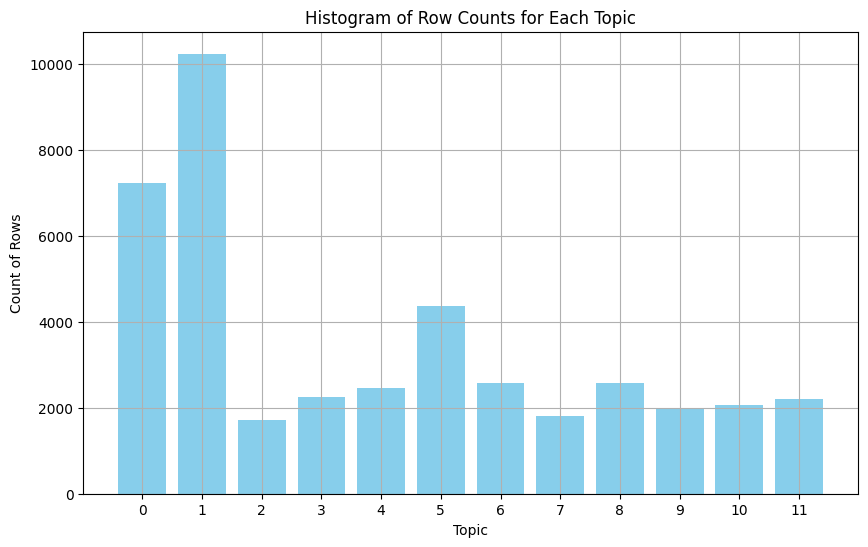

In [39]:
import matplotlib.pyplot as plt

topic_counts = data['topic'].value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(topic_counts.index, topic_counts.values, color='skyblue')

# Set labels and title
plt.xlabel('Topic')
plt.ylabel('Count of Rows')
plt.title('Histogram of Row Counts for Each Topic')

# Set x-axis ticks
plt.xticks(topic_counts.index)

# Show grid
plt.grid(True)

# Show plot
plt.show()

In [40]:
data.to_csv('blogs_with_topic_clusters.csv')

In [29]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel

# Load data from CSV
data2 = pd.read_csv('/kaggle/input/codeforces-blog-dataset-for-learning-only/output.csv')
row = data2.iloc[4918]
print(row)

data2 = data2.drop(4918, axis=0)

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings for a given text
def get_bert_embeddings(text):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    # Forward pass through BERT model
    with torch.no_grad():
        outputs = model(**inputs)
    # Extract embeddings from BERT output
    embeddings = outputs.last_hidden_state.mean(dim=1)  # Using mean pooling to get sentence embeddings
    return embeddings

# Get BERT embeddings for all blog titles
bert_embeddings = []
for title in tqdm(data['title']):
    embeddings = get_bert_embeddings(title)
    bert_embeddings.append(embeddings)

# Convert embeddings to numpy array for further processing
bert_embeddings = torch.stack(bert_embeddings).numpy()

# Add BERT embeddings as a new column in the DataFrame
data2['bert_embeddings'] = bert_embeddings.tolist()

# Save the DataFrame to a new CSV file
data2.to_csv('blog_data_with_bert_embeddings.csv', index=False)


id                                                          93917
title           "Lorem ipsum dolor sit amet, consectetur adipi...
content         "Lorem ipsum dolor sit amet, consectetur adipi...
authorHandle                                            Oye_Dalle
authorID                                                     2980
rating                                                        -41
tags                                                           []
Name: 4918, dtype: object


100%|██████████| 41462/41462 [39:03<00:00, 17.69it/s] 


In [30]:
check = pd.read_csv('blog_data_with_bert_embeddings.csv')
print(check.shape)

(41462, 8)


In [41]:
import pandas as pd
df_new = pd.read_csv("/kaggle/working/blogs_with_topic_clusters.csv")
df_new.drop("Unnamed: 0", axis = 1, inplace=True)
df_new.head()

,id,title,content,authorHandle,authorID,rating,tags,title_trigrams,topic
0,70681,"""ICPC India Online Round 2019 Discussion""","""This blog is to discuss the problems of ICPC ...",kjain1810,1,113,[],"['icpc india', 'india online', 'online round',...",3
1,70261,"""Need help in this problem""","""This is the problemhttps://codeforces.com/con...",prabalsingh24,2,0,[],"['need help', 'help problem']",5
2,68226,"""mobil balance problem""","""When multiple objects of weight are given,Obt...",bluespace,3,-17,[],"['mobil balance', 'balance problem']",9
3,68713,"""Need help in the problem 'The least Round Way'.""","""I am getting TLE in TC 11 in the problem,The ...",suvro_coder,4,0,['#dp'],"['need help', 'help problem', ""problem 'the"", ...",5
4,70585,"""Help with DFS""","""i've been solving this problem for a day nowh...",tensaida,5,-3,[],['help dfs'],3


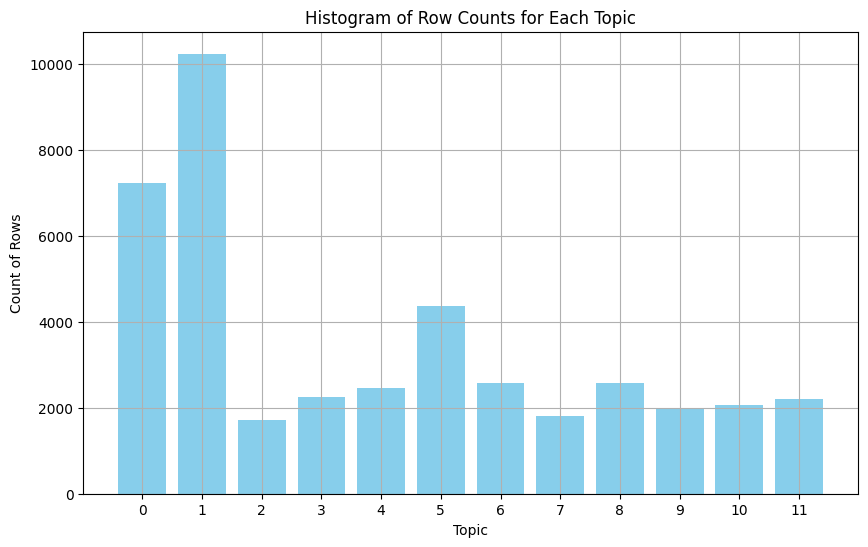

In [42]:
import matplotlib.pyplot as plt

topic_counts = df_new['topic'].value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(topic_counts.index, topic_counts.values, color='skyblue')

# Set labels and title
plt.xlabel('Topic')
plt.ylabel('Count of Rows')
plt.title('Histogram of Row Counts for Each Topic')

# Set x-axis ticks
plt.xticks(topic_counts.index)

# Show grid
plt.grid(True)

# Show plot
plt.show()

In [16]:
df_new.head(10)

,id,title,content,authorHandle,authorID,rating,tags,title_trigrams,topic,custom rating score
0,70681,"""ICPC India Online Round 2019 Discussion""","""This blog is to discuss the problems of ICPC ...",kjain1810,1,113,[],"['""icpc india online', 'india online round', '...",2,1.978457
1,70261,"""Need help in this problem""","""This is the problemhttps://codeforces.com/con...",prabalsingh24,2,0,[],"['""need help in', 'help in this', 'in this pro...",6,1.000000
2,68226,"""mobil balance problem""","""When multiple objects of weight are given,Obt...",bluespace,3,-17,[],"['""mobil balance problem""']",9,0.672523
3,68713,"""Need help in the problem 'The least Round Way'.""","""I am getting TLE in TC 11 in the problem,The ...",suvro_coder,4,0,['#dp'],"['""need help in', 'help in the', 'in the probl...",6,1.000000
4,70585,"""Help with DFS""","""i've been solving this problem for a day nowh...",tensaida,5,-3,[],"['""help with dfs""']",6,0.940072
5,70358,"""Сodeforces Round 591 (and Technocup 2020 — El...","""1223A - CMEIdea:RomsTutorialTutorial is loadi...",Roms,6,112,[],"['""сodeforces round 591', 'round 591 (and', '5...",4,1.977587
6,70730,"""Problem — any help?""","""We have a two strings:AandB. We need to find ...",imaking,7,4,"['#interview', '#strings']","['""problem — any', '— any help?""']",0,1.079830
7,71563,"""Tricks or best approaches for greedy(ad-hoc) ...","""Hi! I'm looking for the best approaches to fi...",baka_,8,-3,"['#greedy', '#adhoc']","['""tricks or best', 'or best approaches', 'bes...",5,0.940072
8,67292,"""Purpose of Codeforces ""","""Hi all, I am new to this website.However I wo...",I_love_GOT,9,0,[],"['""purpose of codeforces', 'of codeforces ""']",4,1.000000
9,67452,"""Changing 'int' to 'Integer' gives significant...","""I tried to solvethisproblem. Refer to my solu...",vivekiitian,10,24,[],"['""changing \'int\' to', ""'int' to 'integer'"",...",6,1.446244


In [140]:
import pandas as pd
import numpy as np
import random
import math

class UCB:
  """
  This class implements the UCB (Upper Confidence Bound) algorithm for MAB.
  """
  def __init__(self, num_topics, blog_data):
    self.num_topics = num_topics
    self.wins = [0] * num_topics  # Wins for each topic
    self.trials = [0] * num_topics  # Total times each topic has been recommended
    self.avg_rewards = [0] * num_topics  # Average reward (rating) for each topic
    self.blog_data = blog_data
    
  def recommend(self, num_recommendations):
    """
    Recommends a set of blogs based on the UCB formula.
    """
    print("Trials: ",self.trials)
    print("Avg rewards: ",self.avg_rewards)
    
    ucb_values = []
    for i in range(self.num_topics):
      if self.trials[i] > 0 and self.trials[i] <= 7:
        ucb_value = self.avg_rewards[i] + math.sqrt(2 * math.log(sum(self.trials)) / self.trials[i])
      elif self.trials[i] != 0 and self.trials[i] > 7:
        ucb_value = self.avg_rewards[i]
      else:
        ucb_value = -1  # Explore new topics with high initial value. Marking it with -1.
      ucb_values.append(ucb_value)
    
    for i in range(len(ucb_values)):
        if ucb_values[i] == -1:
            ucb_values[i] = max(ucb_values) - 1
        
    topic_probs = [v / sum(ucb_values) for v in ucb_values]  # Probability of selecting each topic
    
    # Sample topics based on probabilities and select blogs proportionally to reward
    recommended_blogs = []
    
    if sum(self.trials) == 0:  # Check for no user interaction
        # Uniform random sampling if no interaction data
        recommended_blogs = self.blog_data.sample(num_recommendations)["id"].tolist()
    else:
        for _ in range(num_recommendations):
          chosen_topic = np.random.choice(self.num_topics, p=topic_probs)
          topic_data = self.blog_data[self.blog_data["topic"] == chosen_topic]
          # Sample a blog from the chosen topic based on rating probabilities
          sampled_blog = topic_data.sample(1, weights="custom rating score").iloc[0]["id"]  # Get ID of sampled blog
          recommended_blogs.append(sampled_blog)

    return recommended_blogs, topic_probs

  def update(self, topic, reward):
    """
    Updates the UCB model after a user interacts with a topic (represented by a blog).
    """
    self.trials[topic] += 1
    self.wins[topic] += reward
    self.avg_rewards[topic] = self.wins[topic] / self.trials[topic]

# Load blog data from CSV
def load_data(filename):
  data = pd.read_csv(filename)
  data["topic"] = data["topic"].astype(int)  # Ensure topic is integer
  return data

# Simulate user interaction
def simulate_user(ucb, num_interactions, recommended_blogs):
  liked_topics = [9, 3, 4]
  disliked_topics = [1, 7]
  for _ in range(num_interactions):
    # Randomly choose a user (assuming implicit feedback through interaction)
    blog_id = random.randint(0, len(recommended_blogs) - 1)
    topic = recommended_blogs.loc[blog_id, "topic"]  # Get topic from user data
    if int(topic) in liked_topics:
        rating = random.uniform(5, 7.5)
    elif int(topic) in disliked_topics:
        rating = random.uniform(0, 0.5)
    else:
        rating = random.uniform(0.5, 2.00)
        
    ucb.update(topic, rating)


Trials:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Avg rewards:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Trials:  0


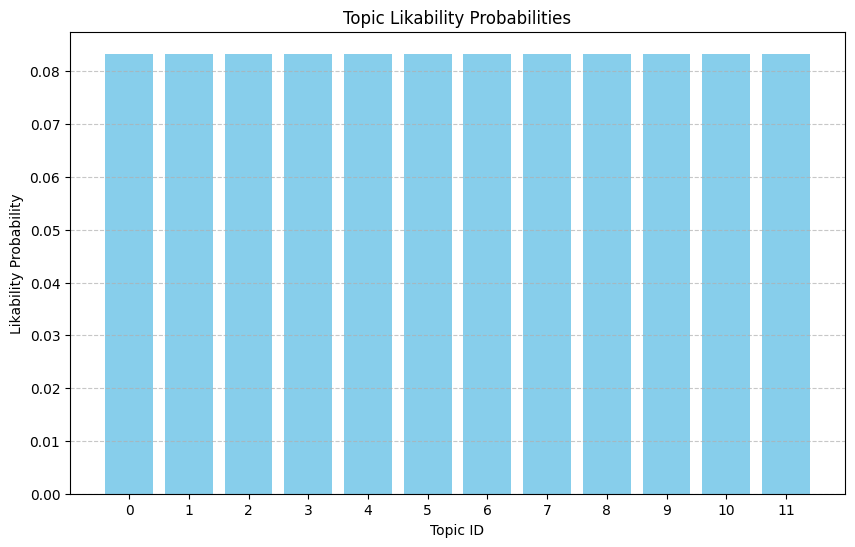

Trials:  [9, 7, 5, 0, 4, 3, 2, 7, 4, 8, 0, 1]
Avg rewards:  [1.0050344766010915, 0.24844248964929264, 1.4235470507145487, 0, 6.28083774589705, 0.9365862070684808, 1.548895589978953, 0.24074306086065506, 1.3466570879220208, 6.629050742704986, 0, 0.5385796619411545]
Trials:  50


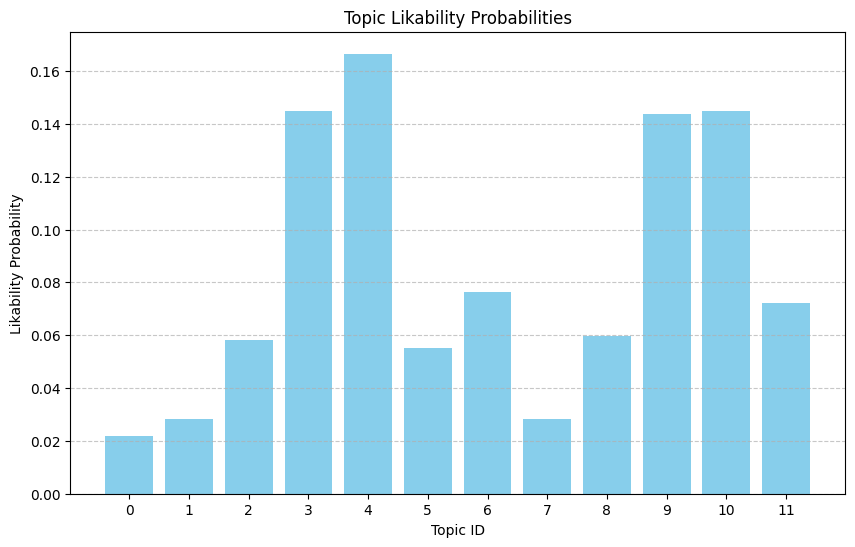

Trials:  [9, 8, 7, 10, 7, 6, 7, 9, 10, 14, 11, 2]
Avg rewards:  [1.0050344766010915, 0.25254876259816156, 1.290431388605278, 6.058689930560155, 6.302792463767837, 1.1894791345765543, 1.4105823901013017, 0.2617525375333602, 1.2500044979713967, 6.436817656905558, 1.1302103935751964, 0.7486113666908945]
Trials:  100


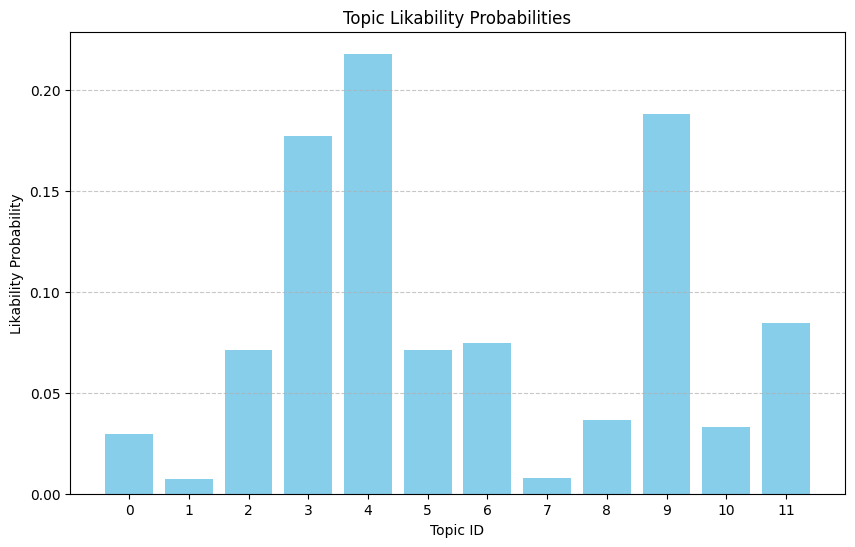

Trials:  [10, 8, 12, 17, 14, 10, 11, 9, 12, 25, 14, 8]
Avg rewards:  [1.013976088889303, 0.25254876259816156, 1.342594974539687, 6.238541424367776, 6.288079919604487, 1.1680013647534904, 1.3309457378104332, 0.2617525375333602, 1.2506260944773937, 6.378928124454917, 1.2076253783856046, 1.1476143586974723]
Trials:  150


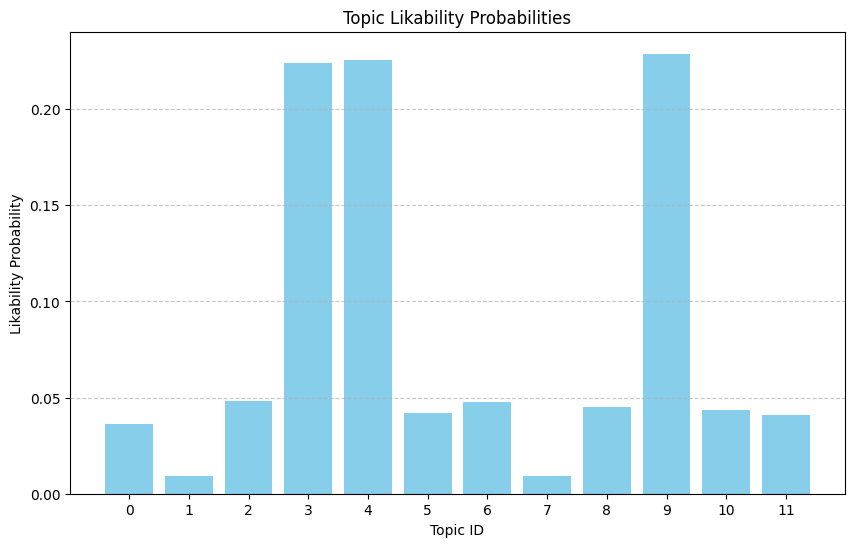

Trials:  [16, 9, 17, 25, 23, 12, 11, 9, 17, 35, 15, 11]
Avg rewards:  [1.0871984413306697, 0.26263225104264953, 1.247065862712492, 6.338801983630045, 6.259787514730638, 1.2723642582268686, 1.3309457378104332, 0.2617525375333602, 1.113948418408168, 6.281240074816632, 1.1815379175469545, 1.1546345172545402]
Trials:  200


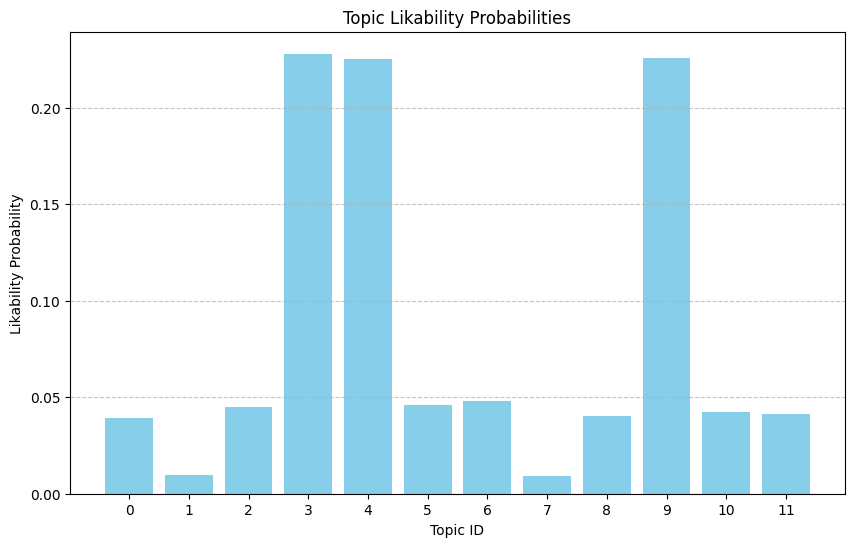

Trials:  [17, 12, 19, 36, 31, 15, 15, 9, 20, 43, 20, 13]
Avg rewards:  [1.1168126632244284, 0.26984352268812795, 1.2142347136141936, 6.2599092929003906, 6.347224017076304, 1.2045609070331942, 1.313112175918681, 0.2617525375333602, 1.0852459531551817, 6.322865194893894, 1.187254218483189, 1.0716536680380755]
Trials:  250


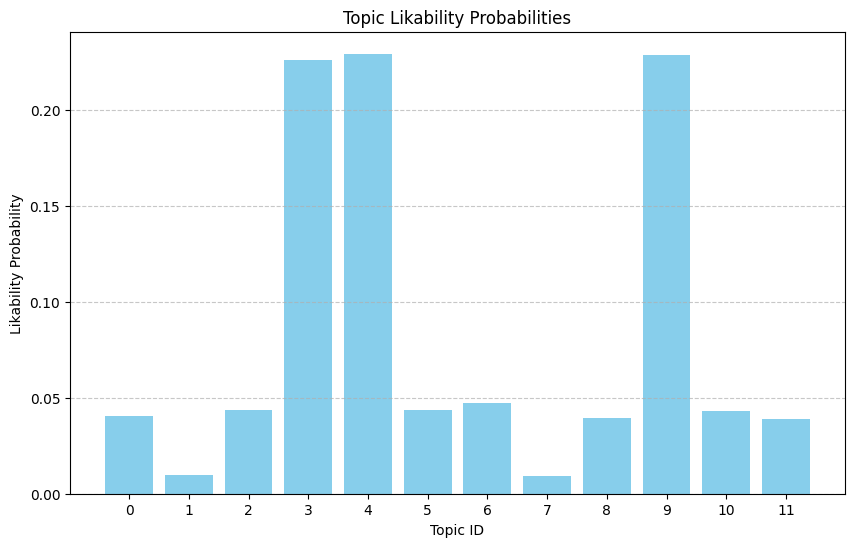

Recommended blog IDs: 


In [153]:
# Example usage
filename = "/kaggle/input/blogs-with-topics/blogs_with_topic_clusters.csv"  # Replace with your actual filename
blog_data = load_data(filename)
num_topics = len(df_new["topic"].unique())
df_new['custom rating score'] = np.tanh(df_new["rating"] / 50) + 1
ucb = UCB(num_topics, df_new )# Store data in UCB object

num_recommendations_initial = 50
recommended_blogs_initial, topic_probs_initial = ucb.recommend(num_recommendations_initial)

# Topic IDs (x-axis)
topic_ids = range(len(topic_probs_initial))

print("Trials: ",sum(ucb.trials))
# Plot histogram or bar graph
plt.figure(figsize=(10, 6))
plt.bar(topic_ids, topic_probs_initial, color='skyblue')
plt.xlabel('Topic ID')
plt.ylabel('Likability Probability')
plt.title('Topic Likability Probabilities')
plt.xticks(topic_ids)  # Set x-axis ticks to topic IDs
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

recommended_blogs_df = pd.DataFrame(columns=df_new.columns)
for blog_id in recommended_blogs_initial:
    row = df_new[df_new["id"]==blog_id]
    new_row = {
        "id": row["id"].values[0],
        "title": row["title"].values[0],
        "content": row["content"].values[0],
        "rating": row["rating"].values[0],
        "topic": row["topic"].values[0]
    }
    # Convert the new row to a DataFrame
    new_row_df = pd.DataFrame([new_row])

    # Concatenate the new row DataFrame with the original DataFrame
    recommended_blogs_df = pd.concat([recommended_blogs_df, new_row_df], ignore_index=True)

simulate_user(ucb, 50, recommended_blogs_df)  # Simulate 50 user interactions

num_recommendations = 50  # Get 50 recommendations

# Get recommendations after simulations
recommended_blogs, topic_probs = ucb.recommend(num_recommendations)

# Topic IDs (x-axis)
topic_ids = range(len(topic_probs))

print("Trials: ",sum(ucb.trials))
# Plot histogram or bar graph
plt.figure(figsize=(10, 6))
plt.bar(topic_ids, topic_probs, color='skyblue')
plt.xlabel('Topic ID')
plt.ylabel('Likability Probability')
plt.title('Topic Likability Probabilities')
plt.xticks(topic_ids)  # Set x-axis ticks to topic IDs
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

recommended_blogs_df = pd.DataFrame(columns=df_new.columns)
for blog_id in recommended_blogs:
    row = df_new[df_new["id"]==blog_id]
    new_row = {
        "id": row["id"].values[0],
        "title": row["title"].values[0],
        "content": row["content"].values[0],
        "rating": row["rating"].values[0],
        "topic": row["topic"].values[0]
    }
    # Convert the new row to a DataFrame
    new_row_df = pd.DataFrame([new_row])

    # Concatenate the new row DataFrame with the original DataFrame
    recommended_blogs_df = pd.concat([recommended_blogs_df, new_row_df], ignore_index=True)

simulate_user(ucb, 50, recommended_blogs_df)  # Simulate 50 user interactions

num_recommendations = 50  # Get 50 recommendations

# Get recommendations after simulations
recommended_blogs, topic_probs = ucb.recommend(num_recommendations)

# Topic IDs (x-axis)
topic_ids = range(len(topic_probs))

print("Trials: ",sum(ucb.trials))
# Plot histogram or bar graph
plt.figure(figsize=(10, 6))
plt.bar(topic_ids, topic_probs, color='skyblue')
plt.xlabel('Topic ID')
plt.ylabel('Likability Probability')
plt.title('Topic Likability Probabilities')
plt.xticks(topic_ids)  # Set x-axis ticks to topic IDs
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

df_recommendations = pd.DataFrame(columns=["id", "title", "content", "rating", "topic"])

recommended_blogs_df = pd.DataFrame(columns=df_new.columns)
for blog_id in recommended_blogs:
    row = df_new[df_new["id"]==blog_id]
    new_row = {
        "id": row["id"].values[0],
        "title": row["title"].values[0],
        "content": row["content"].values[0],
        "rating": row["rating"].values[0],
        "topic": row["topic"].values[0]
    }
    # Convert the new row to a DataFrame
    new_row_df = pd.DataFrame([new_row])

    # Concatenate the new row DataFrame with the original DataFrame
    recommended_blogs_df = pd.concat([recommended_blogs_df, new_row_df], ignore_index=True)

simulate_user(ucb, 50, recommended_blogs_df)  # Simulate 50 user interactions

num_recommendations = 50  # Get 50 recommendations

# Get recommendations after simulations
recommended_blogs, topic_probs = ucb.recommend(num_recommendations)


# Topic IDs (x-axis)
topic_ids = range(len(topic_probs))

print("Trials: ",sum(ucb.trials))
# Plot histogram or bar graph
plt.figure(figsize=(10, 6))
plt.bar(topic_ids, topic_probs, color='skyblue')
plt.xlabel('Topic ID')
plt.ylabel('Likability Probability')
plt.title('Topic Likability Probabilities')
plt.xticks(topic_ids)  # Set x-axis ticks to topic IDs
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


df_recommendations = pd.DataFrame(columns=["id", "title", "content", "rating", "topic"])

recommended_blogs_df = pd.DataFrame(columns=df_new.columns)
for blog_id in recommended_blogs:
    row = df_new[df_new["id"]==blog_id]
    new_row = {
        "id": row["id"].values[0],
        "title": row["title"].values[0],
        "content": row["content"].values[0],
        "rating": row["rating"].values[0],
        "topic": row["topic"].values[0]
    }
    # Convert the new row to a DataFrame
    new_row_df = pd.DataFrame([new_row])

    # Concatenate the new row DataFrame with the original DataFrame
    recommended_blogs_df = pd.concat([recommended_blogs_df, new_row_df], ignore_index=True)

simulate_user(ucb, 50, recommended_blogs_df)  # Simulate 50 user interactions

num_recommendations = 50  # Get 50 recommendations

# Get recommendations after simulations
recommended_blogs, topic_probs = ucb.recommend(num_recommendations)

# Topic IDs (x-axis)
topic_ids = range(len(topic_probs))

print("Trials: ",sum(ucb.trials))
# Plot histogram or bar graph
plt.figure(figsize=(10, 6))
plt.bar(topic_ids, topic_probs, color='skyblue')
plt.xlabel('Topic ID')
plt.ylabel('Likability Probability')
plt.title('Topic Likability Probabilities')
plt.xticks(topic_ids)  # Set x-axis ticks to topic IDs
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


df_recommendations = pd.DataFrame(columns=["id", "title", "content", "rating", "topic"])

recommended_blogs_df = pd.DataFrame(columns=df_new.columns)
for blog_id in recommended_blogs:
    row = df_new[df_new["id"]==blog_id]
    new_row = {
        "id": row["id"].values[0],
        "title": row["title"].values[0],
        "content": row["content"].values[0],
        "rating": row["rating"].values[0],
        "topic": row["topic"].values[0]
    }
    # Convert the new row to a DataFrame
    new_row_df = pd.DataFrame([new_row])

    # Concatenate the new row DataFrame with the original DataFrame
    recommended_blogs_df = pd.concat([recommended_blogs_df, new_row_df], ignore_index=True)

simulate_user(ucb, 50, recommended_blogs_df)  # Simulate 50 user interactions

num_recommendations = 50  # Get 50 recommendations

# Get recommendations after simulations
recommended_blogs, topic_probs = ucb.recommend(num_recommendations)

# Topic IDs (x-axis)
topic_ids = range(len(topic_probs))

print("Trials: ",sum(ucb.trials))
# Plot histogram or bar graph
plt.figure(figsize=(10, 6))
plt.bar(topic_ids, topic_probs, color='skyblue')
plt.xlabel('Topic ID')
plt.ylabel('Likability Probability')
plt.title('Topic Likability Probabilities')
plt.xticks(topic_ids)  # Set x-axis ticks to topic IDs
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


print(f"Recommended blog IDs: ")
df_recommendations = pd.DataFrame(columns=["id", "title", "content", "rating", "topic"])

for blog_id in recommended_blogs:
    row = df_new[df_new["id"]==blog_id]
    new_row = {
        "id": row["id"].values[0],
        "title": row["title"].values[0],
        "content": row["content"].values[0],
        "rating": row["rating"].values[0],
        "topic": row["topic"].values[0]
    }
    # Convert the new row to a DataFrame
    new_row_df = pd.DataFrame([new_row])

    # Concatenate the new row DataFrame with the original DataFrame
    df_recommendations = pd.concat([df_recommendations, new_row_df], ignore_index=True)




In [142]:
print(sum(ucb.trials))

250


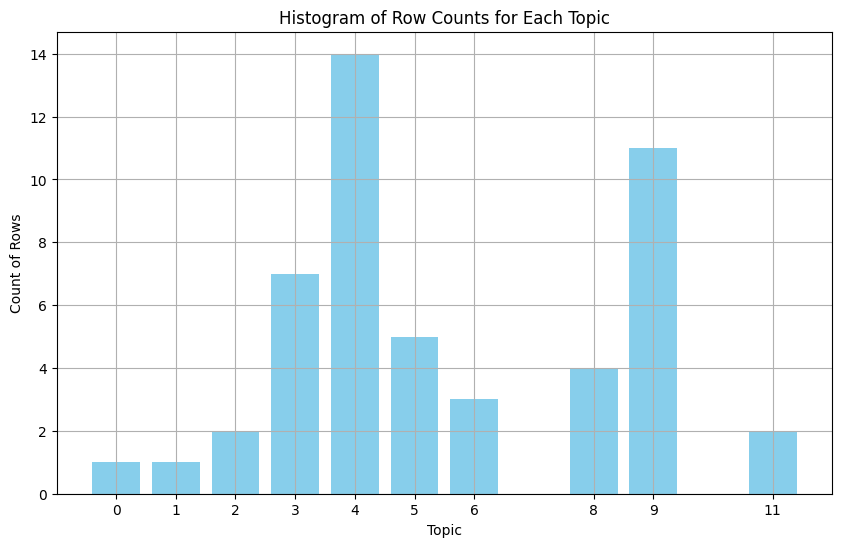

In [144]:
topic_counts = df_recommendations['topic'].value_counts().sort_index()

# Convert index values to integers
topic_indices = topic_counts.index.astype(int)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(topic_indices, topic_counts.values, color='skyblue')

# Set labels and title
plt.xlabel('Topic')
plt.ylabel('Count of Rows')
plt.title('Histogram of Row Counts for Each Topic')

# Set x-axis ticks
plt.xticks(topic_indices)

# Show grid
plt.grid(True)

# Show plot
plt.show()


In [145]:
df_recommendations.head(20)

,id,title,content,rating,topic
0,125796,"""Funny sum :)""","""Let — minimal prime divisor of ..I checked th...",103,6
1,19335,"""A Convex Hull problem !""","""ProblemMy solutionFirst make a convex hull , ...",0,4
2,55965,"""Problems which utilize Dilworth's theorem""","""Could anyone suggest some problems which util...",1,11
3,54418,"""Help needed in ICPC Amritapuri 2010 problems ""","""Recently we were solving problems from past I...",16,4
4,93710,"""Calculate on strings.""","""I just want to share something to community, ...",24,9
5,59799,"""[I'm a newbie] Need help with a undirected gr...","""Hi, i'm have problems whit find cicle inD. Su...",0,5
6,88497,"""Codeforces Round #706""","""Hello, Codeforces!Daniel_yuan,waaitg,smg23333...",580,5
7,46648,"""AtCoder Grand Contest 003""","""AtCoder Grand Contest 003will be held on Sund...",103,3
8,59248,"""TLE IN SPOJ GCDEX""","""I am getting tle in SPOJ GCDEX despite follow...",6,8
9,67637,"""Maintain subtree information using link/cut t...","""In the tutorial of1172E - Nauuo and ODT, I di...",169,3


Done loading CSV.
PCA starts...
PCA initialized.
Fitting PCA...
PCA fitting completed.


Clustering Progress: 100%|██████████| 23/23 [01:47<00:00,  4.66s/it]


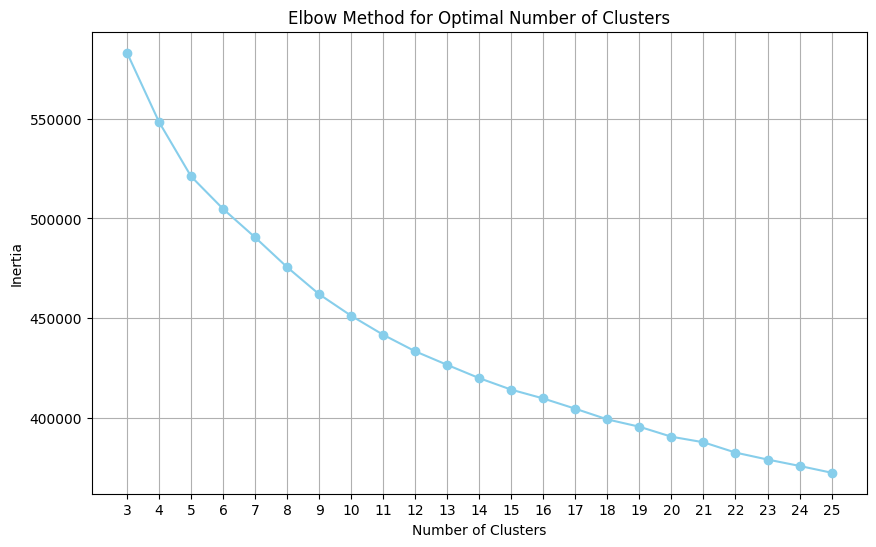

In [112]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tqdm import tqdm
import ast
import warnings

# Load the DataFrame from the CSV file
df_embeddings = pd.read_csv("/kaggle/input/blog-bert-embeddings/blog_data_with_bert_embeddings.csv")
print('Done loading CSV.')

# Extract BERT embeddings from DataFrame and convert string representations to arrays using NumPy
embeddings = np.array([np.array(ast.literal_eval(embedding)) for embedding in df_embeddings['bert_embeddings']])

# Flatten the embeddings array to 2D
embeddings_flat = embeddings.reshape(embeddings.shape[0], -1)

print('PCA starts...')
# Initialize PCA with 30 components
pca = PCA(n_components=30)
print('PCA initialized.')

print('Fitting PCA...')
# Fit PCA to flattened BERT embeddings
embeddings_pca = pca.fit_transform(embeddings_flat)
print('PCA fitting completed.')

# Concatenate PCA-transformed embeddings into a single column
df_embeddings['pca'] = [embedding for embedding in embeddings_pca]

# Implement elbow method for K-means clustering with tqdm progress bar
min_clusters = 3
max_clusters = 25
inertia_values = []

# Suppress warnings for KMeans
warnings.filterwarnings('ignore')

for n_clusters in tqdm(range(min_clusters, max_clusters + 1), desc="Clustering Progress"):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(embeddings_pca)
    inertia_values.append(kmeans.inertia_)

# Reset warnings filter
warnings.resetwarnings()

# Plot inertia values to find optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(min_clusters, max_clusters + 1), inertia_values, marker='o', color='skyblue')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(min_clusters, max_clusters + 1))
plt.grid(True)
plt.show()


In [113]:
df_embeddings.columns

Index(['id', 'title', 'content', 'authorHandle', 'authorID', 'rating', 'tags',
       'bert_embeddings', 'pca'],
      dtype='object')

In [114]:
import os

def remove_files(file_paths):
    for file_path in file_paths:
        if os.path.exists(file_path):
            os.remove(file_path)
            print("reomved", file_path)

# Example usage:
file_paths = ["/kaggle/working/blogs_with_topic_clusters.csv", "/kaggle/working/blog_title_embeddings_with_topics.csv"]
remove_files(file_paths)

warnings.filterwarnings('ignore')

# Find optimal number of clusters from the elbow graph
optimal_clusters = 18  # Adjust this based on the visualized elbow graph

# Perform K-means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_embeddings['topic_bert'] = kmeans.fit_predict(embeddings_pca)

In [115]:
df_bert = df_embeddings.copy()
columns_to_drop = ['content', 'authorHandle', 'authorID', 'bert_embeddings']
df_embeddings.drop(columns=columns_to_drop, axis=1, inplace=True)
# Export DataFrame to CSV with topics
df_embeddings.to_csv('blog_title_embeddings_with_topics.csv', index=False)

# Reset warnings filter
warnings.resetwarnings()

In [116]:
columns_to_drop = ['bert_embeddings']
df_bert.drop(columns=columns_to_drop, axis=1, inplace=True)

df_bert['topic'] = df_bert['topic_bert']
df_bert.head(10)

,id,title,content,authorHandle,authorID,rating,tags,pca,topic_bert,topic
0,70681,"""ICPC India Online Round 2019 Discussion""","""This blog is to discuss the problems of ICPC ...",kjain1810,1,113,[],"[-0.5040753573556563, 2.244085352074581, 0.809...",11,11
1,70261,"""Need help in this problem""","""This is the problemhttps://codeforces.com/con...",prabalsingh24,2,0,[],"[-1.7991580535571383, -2.05710731031459, -1.16...",5,5
2,68226,"""mobil balance problem""","""When multiple objects of weight are given,Obt...",bluespace,3,-17,[],"[0.539337126536045, -1.2052901163327605, 2.225...",7,7
3,68713,"""Need help in the problem 'The least Round Way'.""","""I am getting TLE in TC 11 in the problem,The ...",suvro_coder,4,0,['#dp'],"[-1.0459319222231676, -1.0795109170677943, -1....",14,14
4,70585,"""Help with DFS""","""i've been solving this problem for a day nowh...",tensaida,5,-3,[],"[-2.025251972152624, -1.1961870848903662, -0.4...",5,5
5,70358,"""Сodeforces Round 591 (and Technocup 2020 — El...","""1223A - CMEIdea:RomsTutorialTutorial is loadi...",Roms,6,112,[],"[-0.8700868185593335, 2.5086704191859663, 0.11...",11,11
6,70730,"""Problem — any help?""","""We have a two strings:AandB. We need to find ...",imaking,7,4,"['#interview', '#strings']","[-2.181965056703895, -2.257465925825348, -0.92...",5,5
7,71563,"""Tricks or best approaches for greedy(ad-hoc) ...","""Hi! I'm looking for the best approaches to fi...",baka_,8,-3,"['#greedy', '#adhoc']","[3.1342603172546255, -1.5471710704248938, 0.58...",6,6
8,67292,"""Purpose of Codeforces ""","""Hi all, I am new to this website.However I wo...",I_love_GOT,9,0,[],"[2.084479199845772, 0.1961742033456734, 1.3423...",0,0
9,67452,"""Changing 'int' to 'Integer' gives significant...","""I tried to solvethisproblem. Refer to my solu...",vivekiitian,10,24,[],"[2.811898962973691, -0.16862221067592023, -2.0...",16,16


Trials:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Avg rewards:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Trials:  0


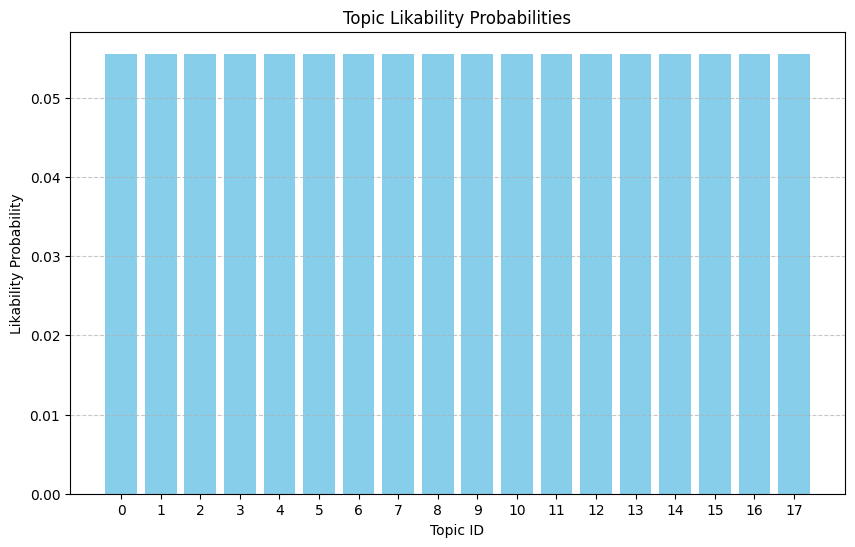

Trials:  [3, 4, 0, 5, 3, 5, 5, 0, 0, 6, 1, 3, 6, 2, 3, 2, 2, 0]
Avg rewards:  [1.0890731819782795, 0.2787882623634318, 0, 5.9829502642236685, 6.197394613523386, 1.5941599455326085, 0.6762977141776635, 0, 0, 5.847988313793903, 1.7220071399517798, 1.3922905314043994, 1.3749216779483262, 1.7654005920405094, 1.2143518330119003, 0.9277652737747475, 1.5831195998012073, 0]
Trials:  50


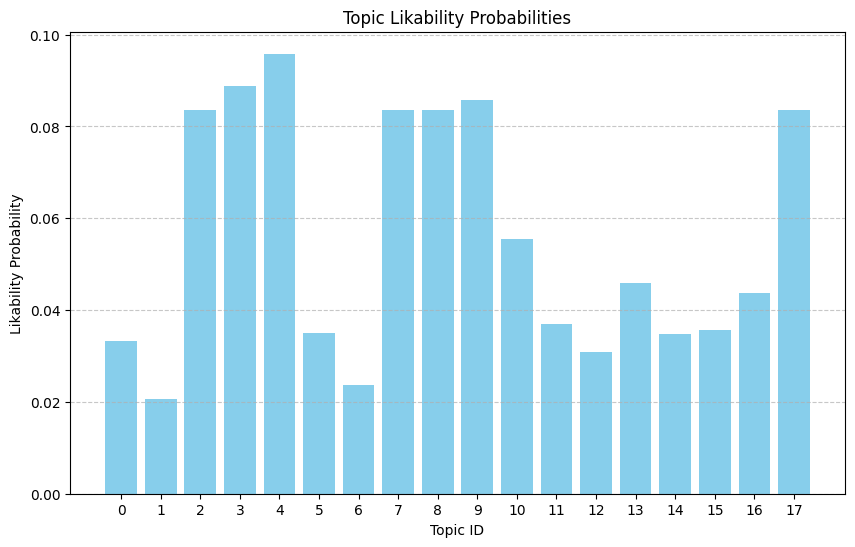

Trials:  [5, 5, 1, 5, 8, 8, 5, 6, 3, 19, 3, 3, 8, 2, 8, 7, 2, 2]
Avg rewards:  [1.2164244466556084, 0.23770117487012535, 1.3530882906968507, 5.9829502642236685, 6.458426879911144, 1.407130659360565, 0.6762977141776635, 0.15285046152899814, 1.549443886774969, 5.986418844956692, 1.6537932166595362, 1.3922905314043994, 1.3588324170447867, 1.7654005920405094, 1.366287997027276, 1.1562596089856036, 1.5831195998012073, 1.1891566687347863]
Trials:  100


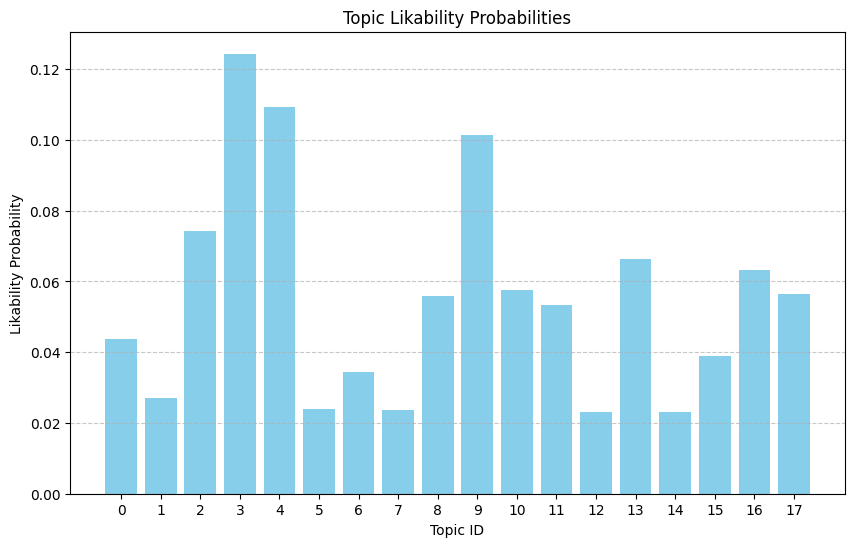

Trials:  [5, 9, 2, 10, 10, 8, 6, 7, 13, 28, 5, 5, 12, 6, 8, 7, 6, 3]
Avg rewards:  [1.2164244466556084, 0.26391846519353623, 1.3042943631344057, 5.890779483571448, 6.320479524640516, 1.407130659360565, 0.8327181098361501, 0.1639622766208346, 1.406481115682836, 6.079790329472272, 1.7732108879085111, 1.3512445082408617, 1.3851575927641067, 1.573780019904403, 1.366287997027276, 1.1562596089856036, 1.4771112662290486, 1.0384847159148733]
Trials:  150


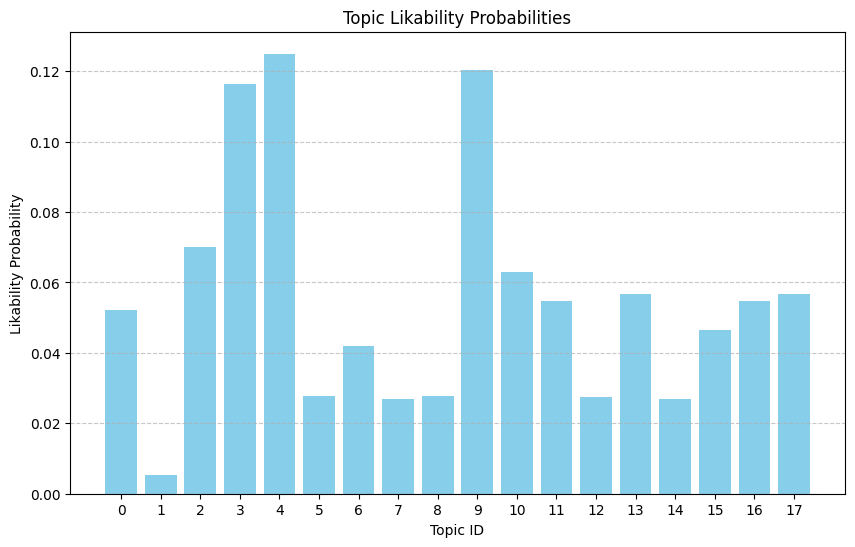

Trials:  [6, 9, 8, 13, 16, 8, 7, 10, 13, 36, 8, 8, 17, 8, 8, 9, 11, 5]
Avg rewards:  [1.331794165015416, 0.26391846519353623, 1.2954612586630911, 6.081588728562147, 6.420668336015537, 1.407130659360565, 0.9075449567209622, 0.24022803608357549, 1.406481115682836, 6.097272143801444, 1.5478474259957244, 1.3727075233256236, 1.3753035848178767, 1.5746353757851297, 1.366287997027276, 1.1551735663241987, 1.4720799111196434, 1.0582175386422366]
Trials:  200


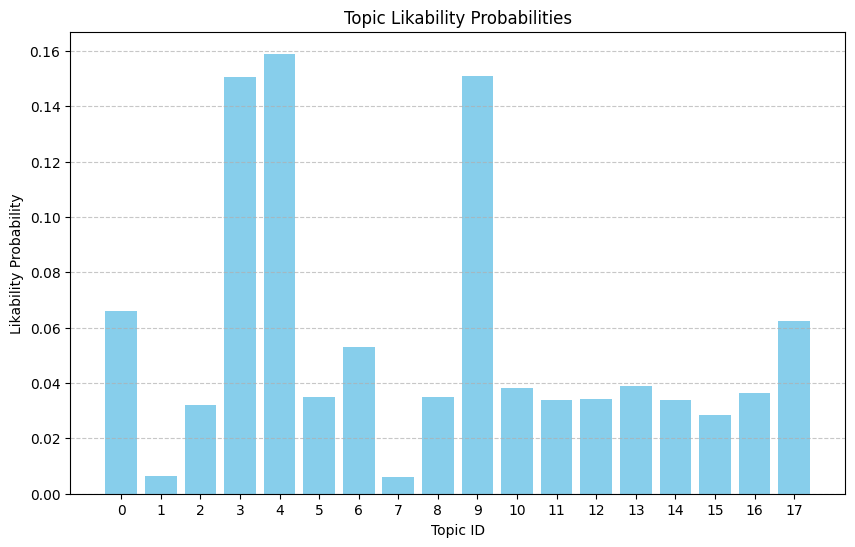

Trials:  [10, 9, 10, 19, 21, 11, 7, 10, 15, 47, 13, 8, 20, 8, 11, 9, 13, 9]
Avg rewards:  [1.3504611840210194, 0.26391846519353623, 1.1667220685449138, 6.179170009104661, 6.483210488043225, 1.345377456237854, 0.9075449567209622, 0.24022803608357549, 1.4016230265119822, 6.092662066475813, 1.5669515625255632, 1.3727075233256236, 1.4017207167052617, 1.5746353757851297, 1.3656488366211923, 1.1551735663241987, 1.4196150060075419, 1.239667032119255]
Trials:  250


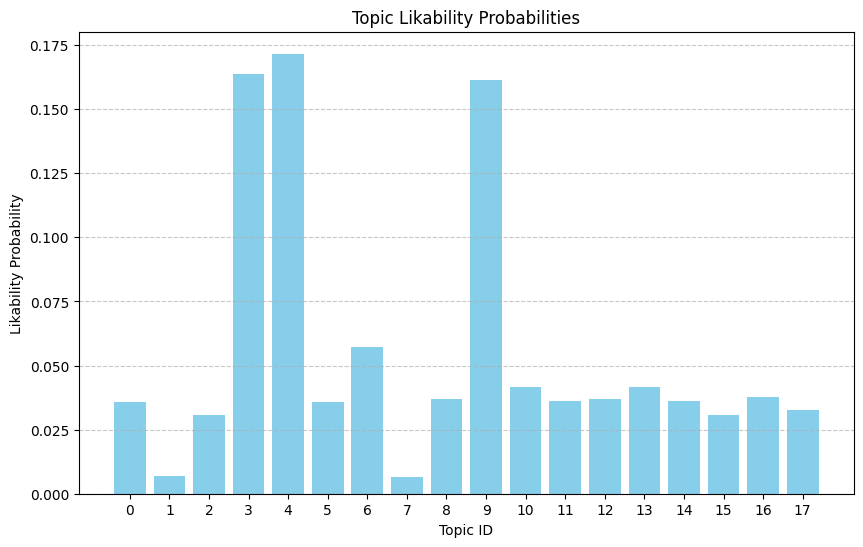

Recommended blog IDs: 


In [146]:
# Example usage
num_topics = len(df_bert["topic"].unique())
df_bert['custom rating score'] = np.tanh(df_bert["rating"] / 50) + 1
ucb2 = UCB(num_topics, df_bert )# Store data in UCB object

num_recommendations_initial = 50
recommended_blogs_initial, topic_probs_initial = ucb2.recommend(num_recommendations_initial)

# Topic IDs (x-axis)
topic_ids = range(len(topic_probs_initial))

print("Trials: ",sum(ucb2.trials))
# Plot histogram or bar graph
plt.figure(figsize=(10, 6))
plt.bar(topic_ids, topic_probs_initial, color='skyblue')
plt.xlabel('Topic ID')
plt.ylabel('Likability Probability')
plt.title('Topic Likability Probabilities')
plt.xticks(topic_ids)  # Set x-axis ticks to topic IDs
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

recommended_blogs_df = pd.DataFrame(columns=df_bert.columns)
for blog_id in recommended_blogs_initial:
    row = df_bert[df_bert["id"]==blog_id]
    new_row = {
        "id": row["id"].values[0],
        "title": row["title"].values[0],
        "content": row["content"].values[0],
        "rating": row["rating"].values[0],
        "topic": row["topic"].values[0]
    }
    # Convert the new row to a DataFrame
    new_row_df = pd.DataFrame([new_row])

    # Concatenate the new row DataFrame with the original DataFrame
    recommended_blogs_df = pd.concat([recommended_blogs_df, new_row_df], ignore_index=True)

simulate_user(ucb2, 50, recommended_blogs_df)  # Simulate 50 user interactions

num_recommendations = 50  # Get 50 recommendations

# Get recommendations after simulations
recommended_blogs, topic_probs = ucb2.recommend(num_recommendations)

# Topic IDs (x-axis)
topic_ids = range(len(topic_probs))

print("Trials: ",sum(ucb2.trials))
# Plot histogram or bar graph
plt.figure(figsize=(10, 6))
plt.bar(topic_ids, topic_probs, color='skyblue')
plt.xlabel('Topic ID')
plt.ylabel('Likability Probability')
plt.title('Topic Likability Probabilities')
plt.xticks(topic_ids)  # Set x-axis ticks to topic IDs
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

recommended_blogs_df = pd.DataFrame(columns=df_bert.columns)
for blog_id in recommended_blogs:
    row = df_bert[df_bert["id"]==blog_id]
    new_row = {
        "id": row["id"].values[0],
        "title": row["title"].values[0],
        "content": row["content"].values[0],
        "rating": row["rating"].values[0],
        "topic": row["topic"].values[0]
    }
    # Convert the new row to a DataFrame
    new_row_df = pd.DataFrame([new_row])

    # Concatenate the new row DataFrame with the original DataFrame
    recommended_blogs_df = pd.concat([recommended_blogs_df, new_row_df], ignore_index=True)

simulate_user(ucb2, 50, recommended_blogs_df)  # Simulate 50 user interactions

num_recommendations = 50  # Get 50 recommendations

# Get recommendations after simulations
recommended_blogs, topic_probs = ucb2.recommend(num_recommendations)

# Topic IDs (x-axis)
topic_ids = range(len(topic_probs))

print("Trials: ",sum(ucb2.trials))
# Plot histogram or bar graph
plt.figure(figsize=(10, 6))
plt.bar(topic_ids, topic_probs, color='skyblue')
plt.xlabel('Topic ID')
plt.ylabel('Likability Probability')
plt.title('Topic Likability Probabilities')
plt.xticks(topic_ids)  # Set x-axis ticks to topic IDs
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

df_recommendations = pd.DataFrame(columns=["id", "title", "content", "rating", "topic"])

recommended_blogs_df = pd.DataFrame(columns=df_bert.columns)
for blog_id in recommended_blogs:
    row = df_bert[df_bert["id"]==blog_id]
    new_row = {
        "id": row["id"].values[0],
        "title": row["title"].values[0],
        "content": row["content"].values[0],
        "rating": row["rating"].values[0],
        "topic": row["topic"].values[0]
    }
    # Convert the new row to a DataFrame
    new_row_df = pd.DataFrame([new_row])

    # Concatenate the new row DataFrame with the original DataFrame
    recommended_blogs_df = pd.concat([recommended_blogs_df, new_row_df], ignore_index=True)

simulate_user(ucb2, 50, recommended_blogs_df)  # Simulate 50 user interactions

num_recommendations = 50  # Get 50 recommendations

# Get recommendations after simulations
recommended_blogs, topic_probs = ucb2.recommend(num_recommendations)


# Topic IDs (x-axis)
topic_ids = range(len(topic_probs))

print("Trials: ",sum(ucb2.trials))
# Plot histogram or bar graph
plt.figure(figsize=(10, 6))
plt.bar(topic_ids, topic_probs, color='skyblue')
plt.xlabel('Topic ID')
plt.ylabel('Likability Probability')
plt.title('Topic Likability Probabilities')
plt.xticks(topic_ids)  # Set x-axis ticks to topic IDs
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


df_recommendations = pd.DataFrame(columns=["id", "title", "content", "rating", "topic"])

recommended_blogs_df = pd.DataFrame(columns=df_bert.columns)
for blog_id in recommended_blogs:
    row = df_bert[df_bert["id"]==blog_id]
    new_row = {
        "id": row["id"].values[0],
        "title": row["title"].values[0],
        "content": row["content"].values[0],
        "rating": row["rating"].values[0],
        "topic": row["topic"].values[0]
    }
    # Convert the new row to a DataFrame
    new_row_df = pd.DataFrame([new_row])

    # Concatenate the new row DataFrame with the original DataFrame
    recommended_blogs_df = pd.concat([recommended_blogs_df, new_row_df], ignore_index=True)

simulate_user(ucb2, 50, recommended_blogs_df)  # Simulate 50 user interactions

num_recommendations = 50  # Get 50 recommendations

# Get recommendations after simulations
recommended_blogs, topic_probs = ucb2.recommend(num_recommendations)

# Topic IDs (x-axis)
topic_ids = range(len(topic_probs))

print("Trials: ",sum(ucb2.trials))
# Plot histogram or bar graph
plt.figure(figsize=(10, 6))
plt.bar(topic_ids, topic_probs, color='skyblue')
plt.xlabel('Topic ID')
plt.ylabel('Likability Probability')
plt.title('Topic Likability Probabilities')
plt.xticks(topic_ids)  # Set x-axis ticks to topic IDs
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


df_recommendations = pd.DataFrame(columns=["id", "title", "content", "rating", "topic"])

recommended_blogs_df = pd.DataFrame(columns=df_bert.columns)
for blog_id in recommended_blogs:
    row = df_bert[df_bert["id"]==blog_id]
    new_row = {
        "id": row["id"].values[0],
        "title": row["title"].values[0],
        "content": row["content"].values[0],
        "rating": row["rating"].values[0],
        "topic": row["topic"].values[0]
    }
    # Convert the new row to a DataFrame
    new_row_df = pd.DataFrame([new_row])

    # Concatenate the new row DataFrame with the original DataFrame
    recommended_blogs_df = pd.concat([recommended_blogs_df, new_row_df], ignore_index=True)

simulate_user(ucb2, 50, recommended_blogs_df)  # Simulate 50 user interactions

num_recommendations = 50  # Get 50 recommendations

# Get recommendations after simulations
recommended_blogs, topic_probs = ucb2.recommend(num_recommendations)

# Topic IDs (x-axis)
topic_ids = range(len(topic_probs))

print("Trials: ",sum(ucb2.trials))
# Plot histogram or bar graph
plt.figure(figsize=(10, 6))
plt.bar(topic_ids, topic_probs, color='skyblue')
plt.xlabel('Topic ID')
plt.ylabel('Likability Probability')
plt.title('Topic Likability Probabilities')
plt.xticks(topic_ids)  # Set x-axis ticks to topic IDs
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


print(f"Recommended blog IDs: ")
df_recommendations = pd.DataFrame(columns=["id", "title", "content", "rating", "topic"])

for blog_id in recommended_blogs:
    row = df_bert[df_bert["id"]==blog_id]
    new_row = {
        "id": row["id"].values[0],
        "title": row["title"].values[0],
        "content": row["content"].values[0],
        "rating": row["rating"].values[0],
        "topic": row["topic"].values[0]
    }
    # Convert the new row to a DataFrame
    new_row_df = pd.DataFrame([new_row])

    # Concatenate the new row DataFrame with the original DataFrame
    df_recommendations = pd.concat([df_recommendations, new_row_df], ignore_index=True)




In [147]:
print(sum(ucb2.trials))

250


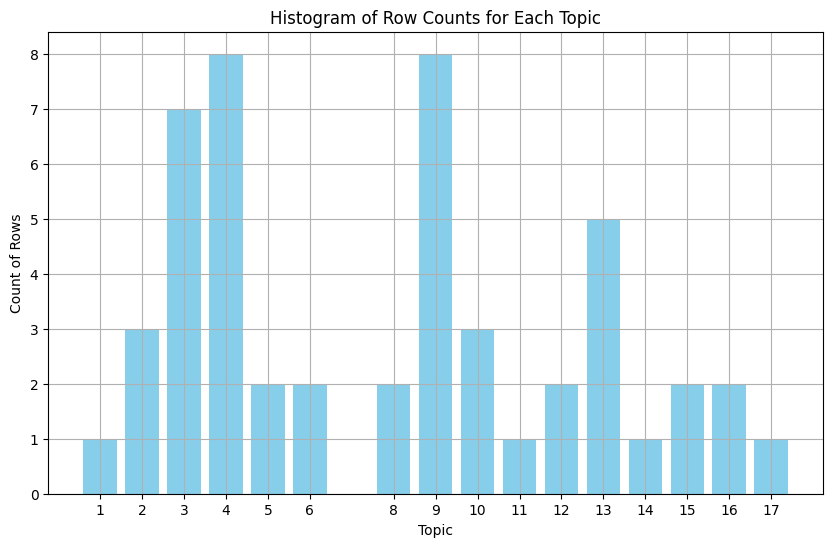

In [148]:
topic_counts = df_recommendations['topic'].value_counts().sort_index()

# Convert index values to integers
topic_indices = topic_counts.index.astype(int)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(topic_indices, topic_counts.values, color='skyblue')

# Set labels and title
plt.xlabel('Topic')
plt.ylabel('Count of Rows')
plt.title('Histogram of Row Counts for Each Topic')

# Set x-axis ticks
plt.xticks(topic_indices)

# Show grid
plt.grid(True)

# Show plot
plt.show()


In [152]:
df_recommendations.head(20)

,id,title,content,rating,topic
0,4194,"""finding an old problem...plz help""","""hello....can sm1 plz help me find a problem.....",3,13
1,70285,"""A question about Longest Non-decreasing Seque...","""I'm recently thinking of a problem. Given a s...",3,9
2,59993,"""I need help to prove a classical graph proble...","""I have come to readthisstackoverflow post. It...",2,6
3,124340,"""Invitation to HackerEarth's January Easy '24""","""Hello Codeforces!I would like to invite you t...",11,4
4,125652,"""Codeforces Round 924 (Div. 2)""","""Hello, Codeforces! We're glad to invite you t...",504,8
5,60509,"""Calculating (a power b) mod p""","""How to calculate (a power b) mod p correctly ...",1,9
6,61025,"""Vector""","""Hello Codeforcers!We are pleased to invite yo...",0,3
7,84354,"""Counting such number whose digit product mult...","""The problemLets product of digits of . Exampl...",63,9
8,404,"""Compilation Error""","""I have written following program for problem ...",0,3
9,60697,"""strstr function not working with #include<bit...","""Here are two submission —Accepted_one||Compil...",-3,16
